In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
X, y = make_classification(n_samples = 1000, n_features = 2, n_informative = 2,
                          n_redundant = 0, n_repeated = 0, n_classes = 2,
                          n_clusters_per_class = 1, weights = [0.9, 0.1],
                          class_sep=0.8, random_state = 0)

In [5]:
df = pd.DataFrame(X, columns=['x1','x2'])
df['target'] = y
df.head()

,x1,x2,target
0,-0.200228,-1.126880,0
1,-0.873630,0.999259,0
2,-0.722953,0.106167,0
3,-0.548422,1.903053,0
4,-1.254758,2.445131,0


In [6]:
df['target'].value_counts()

0    894
1    106
Name: target, dtype: int64

In [8]:
df['target'].value_counts() / df.shape[0]

0    0.894
1    0.106
Name: target, dtype: float64

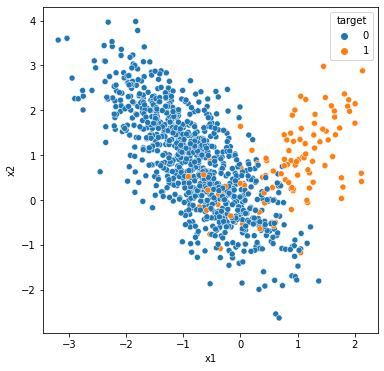

In [7]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='x1', y='x2', hue='target')
plt.show()

In [9]:
from mpl_toolkits.mplot3d import Axes3D

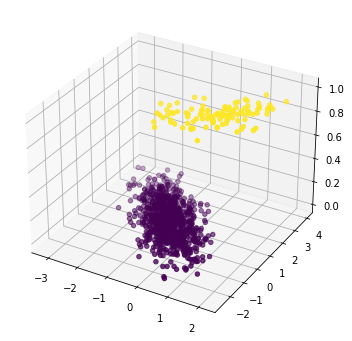

In [10]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['target'], c=df['target'])
plt.show()

## Cách 1: sử dụng SMOTE

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
# khởi tạo
rs = SMOTE()

In [13]:
# cân bằng dữ liệu
X_resample, y_resample = rs.fit_resample(X, y)

In [14]:
df_resample = pd.DataFrame(X_resample, columns=['x1', 'x2'])
df_resample['target'] = y_resample
df_resample.head()

,x1,x2,target
0,-0.200228,-1.126880,0
1,-0.873630,0.999259,0
2,-0.722953,0.106167,0
3,-0.548422,1.903053,0
4,-1.254758,2.445131,0


In [15]:
df_resample['target'].value_counts()

1    894
0    894
Name: target, dtype: int64

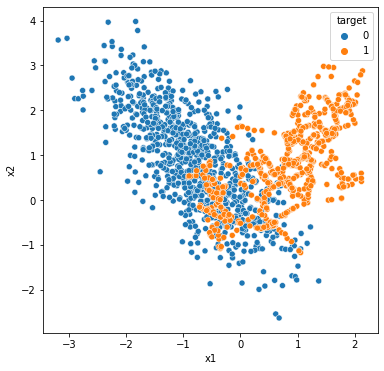

In [17]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_resample, x='x1', y='x2', hue='target')
plt.show()

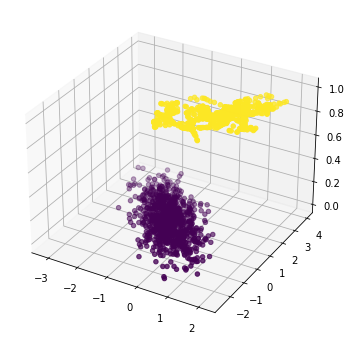

In [18]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_resample['x1'], df_resample['x2'], df_resample['target'], c=df_resample['target'])
plt.show()

## Cách 2: sử dụng RandomOverSampler

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
# khởi tao
rs2 = RandomOverSampler()

In [25]:
# cân bằng
X_resample2, y_resample2 = rs2.fit_resample(X, y)

In [26]:
df_resample2 = pd.DataFrame(X_resample2, columns=['x1', 'x2'])
df_resample2['target'] = y_resample2
df_resample2.head()

,x1,x2,target
0,-0.200228,-1.126880,0
1,-0.873630,0.999259,0
2,-0.722953,0.106167,0
3,-0.548422,1.903053,0
4,-1.254758,2.445131,0


In [27]:
df_resample2['target'].value_counts()

1    894
0    894
Name: target, dtype: int64

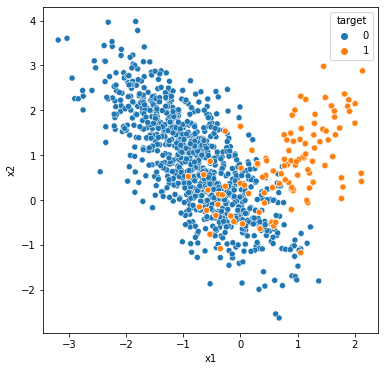

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_resample2, x='x1', y='x2', hue='target')
plt.show()

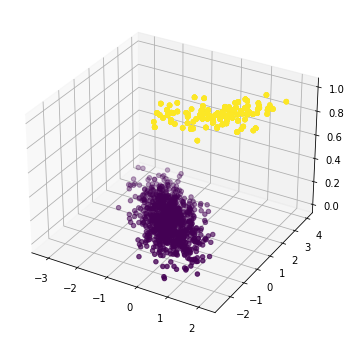

In [29]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_resample2['x1'], df_resample2['x2'], df_resample2['target'], c=df_resample2['target'])
plt.show()

## Cách 3: sử dụng resample

In [30]:
from sklearn.utils import resample

In [31]:
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

In [32]:
df_0.shape, df_1.shape

((894, 3), (106, 3))

In [33]:
df_1_resample = resample(df_1, replace = True, n_samples = df_0.shape[0], random_state = 0)

In [34]:
df_1_resample.shape

(894, 3)

In [35]:
df_resample3 = pd.concat([df_0, df_1_resample])

In [36]:
df_resample3['target'].value_counts()

1    894
0    894
Name: target, dtype: int64

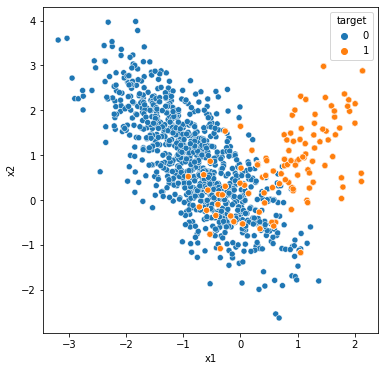

In [37]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_resample3, x='x1', y='x2', hue='target')
plt.show()

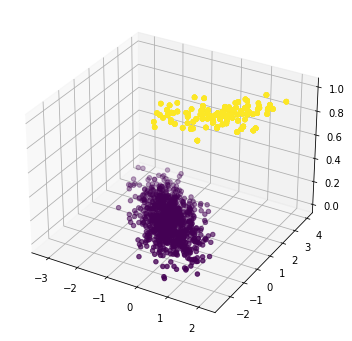

In [38]:
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(111, projection='3d')
ax.scatter(df_resample3['x1'], df_resample3['x2'], df_resample3['target'], c=df_resample3['target'])
plt.show()

## Cân bằng với tỉ lệ khác

In [40]:
rs4 = SMOTE(sampling_strategy={0: 894, 1: 800})

In [41]:
X_rs4, y_rs4 = rs4.fit_resample(X, y)

In [42]:
df_resample4 = pd.DataFrame(X_rs4, columns=['x1', 'x2'])
df_resample4['target'] = y_rs4
df_resample4.head()

,x1,x2,target
0,-0.200228,-1.126880,0
1,-0.873630,0.999259,0
2,-0.722953,0.106167,0
3,-0.548422,1.903053,0
4,-1.254758,2.445131,0


In [43]:
df_resample4['target'].value_counts()

0    894
1    800
Name: target, dtype: int64